In [1]:
!pip install nltk pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 3.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 3.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 3.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 783.8/783.8 kB 3.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 3.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.5/502.5 kB 3.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 4.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

### Imports:

In [2]:
import nltk
from nltk.collocations import *
from nltk.corpus import PlaintextCorpusReader
import pandas as pd
from math import pow
import csv
import glob
import hashlib
import matplotlib.pyplot as plt
import os
import sys

In [ ]:
lab1path = "../../lab1/src/"

sys.path.append(os.path.abspath(lab1path))

from lab1 import exe 

exe('../../lab1/assets/train.csv', 10000)



### Read dataset:

In [4]:

# df = pd.read_csv('../assets/test.csv', header=None)
df = pd.read_csv('../assets/train.csv', header=None)

[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(774, 549, 549, 549, 549, 549, 549, 369, 357, 294, 270, 207, 186, 159, 150, 141, 138, 135, 135, 135, 135, 135, 135, 135, 135, 132, 126, 120, 120, 117)
['new york reuters', 'investor reuters com', 'reuters com fullquote', 'com fullquote aspx', 'fullquote aspx ticker', 'target stocks quickinfo', 'stocks quickinfo fullquote', 'initial public offering', 'n target stocks', 'quote profile research', 'inc investor reuters', 'york reuters u', 'president hugo chavez', 'securities exchange commission', 'reuters u stocks', 'najaf iraq reuters', 'prime minister ariel', 'face verdana ms', 'verdana ms sans', 'ms sans serif', 'sans serif arial', 'serif arial helvetica', 'arial helvetica size', 'helvetica size color', 'size color b', 'n quote profile', 'cleric muqtada al-sadr', 'minister ariel sharon', 'corp investor reuters', 'reuters oil prices']


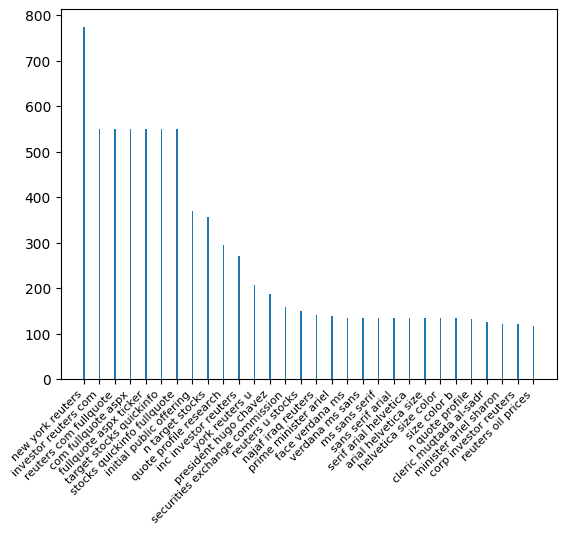

In [102]:

from nltk.corpus import stopwords
nltk.download('stopwords')

def lines(df):
    return df[2].count()


def str_by_id(id, df):
    if id < df[2].count():
        return (df[0].values[id], df[2].values[id] + ' ')
    else:
        raise Exception("id > items in file")



# classes = ['0', '1', '2', '3']

def get_words(baseDir):
    words = []
    classes = glob.glob(baseDir + '/*')
    for cls in classes:
        filenames = glob.glob(cls + '/*.tsv')
        for filename in filenames:
            with open(filename) as fd:
                rd = csv.reader(fd, delimiter='\t')
                for row in rd:
                    words.append(row[0].lower())
    return words

def create_trigrams(words):
    trigrams = []
    for i in range(len(words) - 2):
        trigrams.append([words[i], words[i + 1], words[i + 2]])
    return trigrams



def frq_calculation(trigrams):
    storage = {}
    for trigram in trigrams:
        trigramConcat = ''.join(trigram)
        if trigramConcat in storage:
            count, trigram_ = storage[trigramConcat]
            storage[trigramConcat] = (count + 1, trigram_)
        else:
            storage[trigramConcat] = (1, trigram)
    return storage

baseDir = '../assets/annotated-corpus/train/'
words_nf = get_words(baseDir)
stopwords_new = ['lt', 'http', 'www', 'href', 'gt', 'font'] + stopwords.words('english')
#words = [word for word in words_nf if word not in stopwords.words('english')]
words = [word for word in words_nf if word not in stopwords_new]

trigrams = create_trigrams(words)
storage = frq_calculation(trigrams)
storage_values = list(storage.values())
storage_sorted = sorted(storage_values, key=lambda x: x[0], reverse=True)

fig, ax = plt.subplots()

counts, trigrams_list = zip(*storage_sorted[:30])
trigrams_str = [' '.join(trg) for trg in trigrams_list]
#
print(counts)
print(trigrams_str)
ax.bar(trigrams_str, counts, width=0.1)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()


In [108]:
import nltk
from nltk.collocations import *
from nltk.corpus import PlaintextCorpusReader

bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

#http://www.nltk.org/_modules/nltk/collocations.html
finder_bi = BigramCollocationFinder.from_words(words)
finder_thr = TrigramCollocationFinder.from_words(words)

print(finder_bi.nbest(bigram_measures.pmi, 10))
print(finder_thr.nbest(trigram_measures.student_t, 30))

[("''summer", 'sizzler'), ("'dirty", "list'"), ("'every", "woman'"), ("'first-step'", 'guides'), ("'lampano", "alley'"), ("'magic", "carpet'"), ("'mainstream", "society'"), ("'mass", 'indiscriminate'), ("'super", "saturday'"), ('abdel', 'kader')]
[('new', 'york', 'reuters'), ('target', 'stocks', 'quickinfo'), ('fullquote', 'aspx', 'ticker'), ('stocks', 'quickinfo', 'fullquote'), ('com', 'fullquote', 'aspx'), ('investor', 'reuters', 'com'), ('reuters', 'com', 'fullquote'), ('initial', 'public', 'offering'), ('n', 'target', 'stocks'), ('quote', 'profile', 'research'), ('inc', 'investor', 'reuters'), ('york', 'reuters', 'u'), ('president', 'hugo', 'chavez'), ('securities', 'exchange', 'commission'), ('reuters', 'u', 'stocks'), ('najaf', 'iraq', 'reuters'), ('prime', 'minister', 'ariel'), ('serif', 'arial', 'helvetica'), ('sans', 'serif', 'arial'), ('ms', 'sans', 'serif'), ('verdana', 'ms', 'sans'), ('arial', 'helvetica', 'size'), ('helvetica', 'size', 'color'), ('face', 'verdana', 'ms'), 

(774, 369, 357, 294, 270, 207, 186, 159, 150, 141, 138, 132, 126, 120, 120, 117, 111, 108, 105, 102, 99, 99, 92, 90, 90, 90, 90, 87, 87, 84)
['new york reuters', 'initial public offering', 'n target stocks', 'quote profile research', 'inc investor reuters', 'york reuters u', 'president hugo chavez', 'securities exchange commission', 'reuters u stocks', 'najaf iraq reuters', 'prime minister ariel', 'n quote profile', 'cleric muqtada al-sadr', 'minister ariel sharon', 'corp investor reuters', 'reuters oil prices', 'xp service pack', 'crude oil prices', 'windows xp service', 'iraqi city najaf', 'federal appeals court', 'reuters google inc', 'holy city najaf', 'imam ali shrine', 'wal-mart stores inc', 'san francisco reuters', 'london reuters oil', 'abu ghraib prison', 'new york yankees', 'cleric moqtada al-sadr']


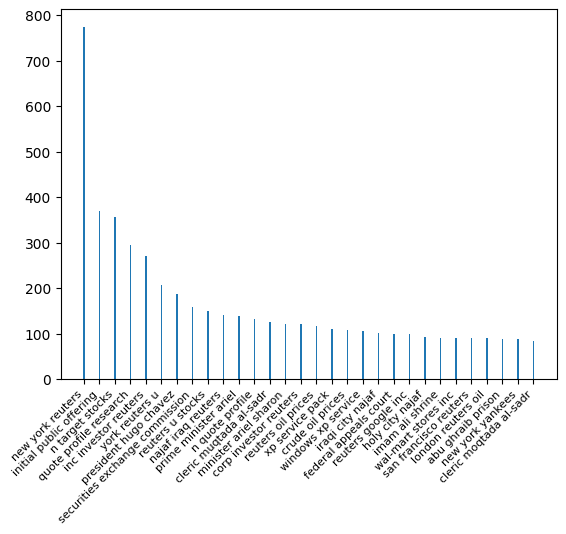

In [103]:
storage_values = list(storage.values())
storage_sorted = sorted(storage_values, key=lambda x: x[0], reverse=True)
storage_sorted = list(filter(lambda x: (x[0] not in [603, 549, 135]) and ('lt' not in x[1]), storage_sorted))

fig, ax = plt.subplots()

counts, trigrams_list = zip(*storage_sorted[:30])
trigrams_str = [' '.join(trg) for trg in trigrams_list]
print(counts)
print(trigrams_str)
ax.bar(trigrams_str, counts, width=0.1)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()

In [104]:
words_count = {}
for word in words:
    if word in words_count:
        words_count[word] += 1
    else:
        words_count[word] = 1

trigrams_count = {}
for trigram in trigrams:
    trg_str = ' '.join(trigram)
    if trg_str in trigrams_count:
        trigrams_count[trg_str] += 1
    else:
        trigrams_count[trg_str] = 1
# print(list(words_count)[:10])
# print(list(trigrams_count)[:10])

def t_score(trigram_str, trigrams_count, words_count):
    words_c = len(words)
    trigrams_c = len(trigrams)
    n = 3
    fc = trigrams_count[trigram_str] / trigrams_c
    trigram = trigram_str.split(' ')
    multiplication = 1
    for word in trigram:
        fn = words_count[word] / words_c
        multiplication *= fn
    return (fc - (multiplication / pow(words_c, n-1)) / pow(fc, 1/n))

tscore_calculated = [(t_score(trigram_str, trigrams_count, words_count), trigram_str) for trigram_str in trigrams_count.keys()]

tscore_sorted = sorted(tscore_calculated, key=lambda x: x[0], reverse=True)
tscore_sorted[:40]



[(0.0012676492313033977, 'new york reuters'),
 (0.0008991465477849713, 'fullquote aspx ticker'),
 (0.0008991465477849713, 'target stocks quickinfo'),
 (0.0008991465477849712, 'com fullquote aspx'),
 (0.0008991465477849712, 'stocks quickinfo fullquote'),
 (0.0008991465477849709, 'investor reuters com'),
 (0.0008991465477849705, 'reuters com fullquote'),
 (0.0006043444009702266, 'initial public offering'),
 (0.0005846909245159102, 'n target stocks'),
 (0.0004815101731307497, 'quote profile research'),
 (0.00044220322022211583, 'inc investor reuters'),
 (0.00033902246883695295, 'york reuters u'),
 (0.00030462888504190287, 'president hugo chavez'),
 (0.00026040856301969115, 'securities exchange commission'),
 (0.00024566845567895154, 'reuters u stocks'),
 (0.00023092834833821573, 'najaf iraq reuters'),
 (0.00022601497922463757, 'prime minister ariel'),
 (0.0002211016101110585, 'face verdana ms'),
 (0.0002211016101110585, 'verdana ms sans'),
 (0.0002211016101110585, 'ms sans serif'),
 (0.00

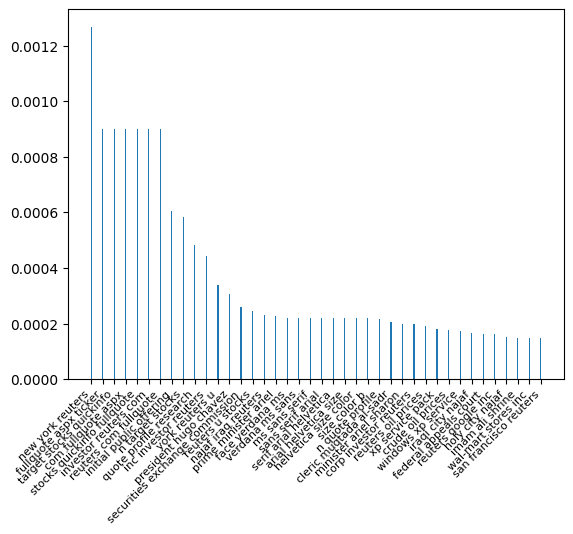

In [105]:
fig, ax = plt.subplots()
tscore_sorted[:40]
counts, trigrams, = zip(*tscore_sorted[:40])
ax.bar(trigrams, counts, width=0.1)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()

In [106]:
for trg in finder_thr.nbest(trigram_measures.student_t, 30):
    print(trg)

('new', 'york', 'reuters')
('lt', 'href', 'http')
('href', 'http', 'www')
('http', 'www', 'investor')
('target', 'stocks', 'quickinfo')
('fullquote', 'aspx', 'ticker')
('stocks', 'quickinfo', 'fullquote')
('com', 'fullquote', 'aspx')
('quickinfo', 'fullquote', 'gt')
('www', 'investor', 'reuters')
('investor', 'reuters', 'com')
('reuters', 'com', 'fullquote')
('n', 'lt', 'gt')
('initial', 'public', 'offering')
('n', 'target', 'stocks')
('quote', 'profile', 'research')
('inc', 'lt', 'href')
('lt', 'b', 'gt')
('york', 'reuters', 'u')
('president', 'hugo', 'chavez')
('gt', 'lt', 'font')
('securities', 'exchange', 'commission')
('lt', 'strong', 'gt')
('reuters', 'u', 'stocks')
('najaf', 'iraq', 'reuters')
('prime', 'minister', 'ariel')
('lt', 'font', 'gt')
('serif', 'arial', 'helvetica')
('sans', 'serif', 'arial')
('ms', 'sans', 'serif')


In [109]:
for count, tscore, mytscore in zip(trigrams_list, finder_thr.nbest(trigram_measures.student_t, 30), trigrams):
    print(f'{count} - by count')
    print(f'{tscore} - by nltk tscore') 
    print(f'{mytscore.split(" ")} - by my t-score;')
    print()

['new', 'york', 'reuters'] - by count
('new', 'york', 'reuters') - by nltk tscore
['new', 'york', 'reuters'] - by my t-score;

['initial', 'public', 'offering'] - by count
('target', 'stocks', 'quickinfo') - by nltk tscore
['fullquote', 'aspx', 'ticker'] - by my t-score;

['n', 'target', 'stocks'] - by count
('fullquote', 'aspx', 'ticker') - by nltk tscore
['target', 'stocks', 'quickinfo'] - by my t-score;

['quote', 'profile', 'research'] - by count
('stocks', 'quickinfo', 'fullquote') - by nltk tscore
['com', 'fullquote', 'aspx'] - by my t-score;

['inc', 'investor', 'reuters'] - by count
('com', 'fullquote', 'aspx') - by nltk tscore
['stocks', 'quickinfo', 'fullquote'] - by my t-score;

['york', 'reuters', 'u'] - by count
('investor', 'reuters', 'com') - by nltk tscore
['investor', 'reuters', 'com'] - by my t-score;

['president', 'hugo', 'chavez'] - by count
('reuters', 'com', 'fullquote') - by nltk tscore
['reuters', 'com', 'fullquote'] - by my t-score;

['securities', 'exchange',